# Konwolucyjne siecie neuronowe

## Convolution neural networks, CNN

<br>

# Filtry jako ekstraktory informacji

<img src="Grafika/Filter.png" width="550">

<img src="Grafika/OriginalAndFilter.png" width="550">

<img src="Grafika/FirstPixelMulitiplication.png" width="550">

<img src="Grafika/SecondMultiplication.png" width="550">

Źródło: https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks/

### Filtrowanie - konwolucja (splot):

<img src="Grafika/matrixConvolution.jpg" width="450">

Źródło: https://i.stack.imgur.com/SKgim.jpga

### Warstwa konwolucyjna

Warstawa konwolucyjna analizuje obraz "kawałek po kawałku" i zwraca informację o poszczególnych obszarach przy użyciu filtrów.

Warstwa konwolucyjna składa się z K filtrów i zwraca K "tablic" powstałych przez przetworzenie wejścia kolejnymi filtrami.

Operacja splotu (konwolucja):

<img src="Grafika/Convolution_schematic.gif" width="450">

Źródło: http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif

### W przypadku macierzy trójwymiarowych, filtorwanie wygląda tak:

<img src="https://i.stack.imgur.com/FjvuN.gif" width="550">

### Sieć konwolucyjna uczy się ekstrachować istotne "informacje" - parametrami sieci są wagi w filtrach.

Czyli sieć sama uczy się tego, co jest istotne w danych dla naszego celu.

W sieciach konwolucyjnych na wyjście splotu nakłada się funkcję aktywacji. Z reguły jest to ReLU:

<img src="Grafika/relu.png" width="350">

Źródło: https://ml4a.github.io/images/figures/relu.png

Takie przekształcenie można interpretować w następujący sposób: jeżeli w danym obszarze jest coś co dany filtr "rozpoznaje" (wartość splotu większa od 0), to zwracamy po prostu wynik splotu. Natomiast jeśli dane nie pasują do danego filtra (wartość ujemna), to niezaleznie od tego co w tych danych jest, zwracamy 0, które mówi, że nie ma tego czego szukamy.

## Pooling (subsampling)

Pooling to agregacja informacji - zamiast przechowywać całą tablicę, którą zwrócił filtr, wyciągamy sobie po jednej "informacji" z podobszarów. W ten sposób otrzymujemy tablicę o zredukowanym wymiarze.

MaxPooling:

<img src="Grafika/MaxPool.png" width="550">

Źródło: https://adeshpande3.github.io/assets/MaxPool.png

Jaką informację wyekstrahuje "max pooling"?

A jaką "average pooling"?

W praktyce z reguły po każdej warstwie konwolucyjnej daje się max pooling.

### Wielowarstwowa sieć konwolucyjna

Wielowarstwowe sieci konwolucyjne wykorzystują wielokrotne składanie operacji filtrowania i uczą się wykrywać bardzo złożone zależności.

Wówczas każda kolejna warstwa w jakiś sposób agreguje informacje z poprzedniej warstwy do ogólniejszego poziomu. Przykladowa interpretacja w kontekście klasyfikacji czy na danym zdjęciu jest człowiek:
- pierwsza warstwa: rozpoznawianie kształtów/konturów
- druga warstwa: detekcja części ciała
- trzecia: detekcja człowiek


<img src="Grafika/LeNet.png" width="700">
Źródło: https://adeshpande3.github.io/assets/LeNet.png"

### Wyjście sieci

Ostatnia warsta konwolucyjna (lub pooling) jest rozwijana do wektora. Ten wektor jest przepuszczany przez warstwy dense, które prowadzą do predykcji. Oczywiście można dokonywać predykcji bezpośrednio z rozwiniętego wektora.

### Uwaga. Filtr dla obrazka 2D jest tablicą 2D. Natomiast kolejne warstwy są 3D - dochodzi wymiar liczby filtrów. Dlatego dalsze filtry są kostami 3D, które mają głębokość równą liczbie filtrów w poprzedniej warstwie.

<img src="Grafika/conv3D.jpg" width="700">

Źródło: https://www.mathworks.com/content/mathworks/www/en/discovery/convolutional-neural-network/_jcr_content/mainParsys/image_copy.img.jpg/1497876372993.jpg

Naturalnie, jeżeli na wejściu mamy obiekt więcej niż dwu-wymiarowy to już pierwsza warstwa używa filtrów, które są kostkami.

## Strides - wielkość kroku przesunięcia

Określa dokładność z jaką chcemy skanować dane.

Strides = (1,1)

<img src="Grafika/Stride1.png" width="600">

Strides = (2,2)

<img src="Grafika/Stride2.png" width="600">

Źródło: https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/


### Jeszcze jednym istotnym parametrem jest rozmiar filtra.

# Przechodzimy do praktyki!

# Obrazki 2D (szare)

http://scikit-learn.org/0.15/auto_examples/applications/face_recognition.html

In [10]:
import numpy as np
import pandas as pd
import os
from keras.utils import np_utils

In [97]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target

target_names = lfw_people.target_names

In [98]:
X[0] # wektor - pozniej zamienimy na macierz, bo to jest obraz

array([ 254.        ,  254.        ,  251.66667175, ...,   87.33333588,
         88.66666412,   86.66666412], dtype=float32)

In [99]:
X.shape

(1288, 1850)

In [100]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([ 77, 236, 121, 530, 109,  71, 144]))

In [101]:
y = np_utils.to_categorical(y)
y

array([[ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]], dtype=float32)

In [102]:
n_classes = y.shape[1]

In [103]:
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], 
      dtype='<U17')

In [104]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4)

X_train = np.array([x.reshape((h, w, 1)) for x in X_train])
X_test = np.array([x.reshape((h, w, 1)) for x in X_test])

X_train = X_train / 255
X_test = X_test / 255

In [105]:
X_train[0]

array([[[ 0.26797387],
        [ 0.33594769],
        [ 0.42091504],
        ..., 
        [ 0.23137255],
        [ 0.20915033],
        [ 0.15163399]],

       [[ 0.31111112],
        [ 0.4013072 ],
        [ 0.48104575],
        ..., 
        [ 0.26274511],
        [ 0.22091503],
        [ 0.19607843]],

       [[ 0.33986926],
        [ 0.44313726],
        [ 0.50196081],
        ..., 
        [ 0.32418299],
        [ 0.25882354],
        [ 0.25490198]],

       ..., 
       [[ 0.0496732 ],
        [ 0.04575163],
        [ 0.05882353],
        ..., 
        [ 0.67189538],
        [ 0.73725492],
        [ 0.73202616]],

       [[ 0.03660131],
        [ 0.03921569],
        [ 0.05359477],
        ..., 
        [ 0.6156863 ],
        [ 0.69934636],
        [ 0.71241832]],

       [[ 0.04183007],
        [ 0.04183007],
        [ 0.05098039],
        ..., 
        [ 0.56862748],
        [ 0.65751636],
        [ 0.65228754]]], dtype=float32)

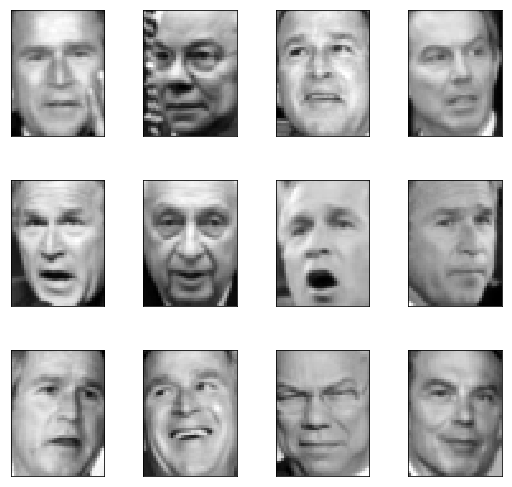

In [106]:
images = X_train[:12]
n_col = 4
n_row = 3
plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[i][:,:,0], cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
    
plt.show()

In [107]:
X_train.shape

(772, 50, 37, 1)

In [12]:
y_train.shape

NameError: name 'y_train' is not defined

In [ ]:
X_test.shape

### Ćwiczenie 1. Punkt odniesienia

Sprawdź klasyfikację przy użyciu perceptrona - sieć 0-warstwowa (lub 1-warstwowa licząc wyjście jako warstwę). Pamiętaj, że, aby uruchomić warstwę dense na danych, które nie są wektorem trzeba je "rozwinąć" przy uzyciu "warstwy" (operacji) Flatten. 

In [108]:
from keras.models import Sequential

from keras.layers import Dense, Flatten, Dropout, Activation

from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D

from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
?Activation

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(50,37,1)))
model.add(Dense(n_classes,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["categorical_accuracy"])

print(model.summary())

In [ ]:
early_stopping = EarlyStopping(patience=3, monitor="val_loss")

model.fit(X_train,y_train,validation_split=0.25,epochs=100,callbacks=[early_stopping])

model.evaluate(X_test,y_test)

Z wyciągnięciem modelu z najlepszej epoki:

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(50,37,1)))
model.add(Dense(n_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
print(model.summary())

early_stopping = EarlyStopping(patience=3,monitor="val_loss")
take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)

model.fit(X_train, y_train, validation_split=0.25, epochs=100, callbacks=[early_stopping,take_best_model], batch_size=32,)

model.load_weights("wagi.h5py")
scores = model.evaluate(X_test, y_test, verbose=0)
os.remove("wagi.h5py")

print("Accuracy test: %.2f%%" % (scores[1]*100))

### Ćwiczenie 2.

Sprawdź klasyfikację przy użyciu sieci jednowarstwowej, dla rozmiarów stanu ukrytego: 20,50,100,150,200,300.

In [ ]:
Accuracies = []

for h_dim in [20,50,100,150,200,300]:

    model = Sequential()
    model.add(Flatten(input_shape=(50,37,1)))
    model.add(Dense(h_dim))
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
    print(model.summary())
    
    early_stopping = EarlyStopping(patience=3,monitor="val_loss")
    take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)
    
    model.fit(X_train, y_train, verbose=0,validation_split=0.25, epochs=100, callbacks=[early_stopping,take_best_model], batch_size=32,)

    model.load_weights("wagi.h5py")
    os.remove("wagi.h5py")
    scores = model.evaluate(X_test, y_test, verbose=0)
    Accuracies.append(scores[1]*100)
    
print(Accuracies)

### Ćwiczenie 3

Weź najlepszą sieć z poprzedniego kroku i dodaj kolejną warstwę dense - rozpatrz takie same wielkosci stanu ukrytego jak poprzednio.

In [ ]:
Accuracies = []

for h_dim in [20,50,100,150,200,300]:

    model = Sequential()
    model.add(Flatten(input_shape=(50,37,1)))
    model.add(Dense(150, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dense(h_dim, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
    print(model.summary())
    
    early_stopping = EarlyStopping(patience=3,monitor="val_loss")
    take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)
    
    model.fit(X_train, y_train, verbose=0,validation_split=0.25, epochs=100, callbacks=[early_stopping,take_best_model], batch_size=32,)

    model.load_weights("wagi.h5py")
    os.remove("wagi.h5py")
    scores = model.evaluate(X_test, y_test, verbose=0)
    Accuracies.append(scores[1]*100)
    
Print(Accuracies)

### Ćwiczenie 4. Prosta sieć konwolucyjna.

Liczba filtrów: 10, wielkość filtra: 5,5.

In [ ]:
?Conv2D

In [ ]:
model = Sequential()
model.add(Conv2D(10, (5, 5), input_shape=(50,37,1), padding='valid', activation='relu'))
model.add(Flatten())
model.add(Dense(n_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
print(model.summary())

early_stopping = EarlyStopping(patience=3,monitor="val_loss")
take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)

model.fit(X_train, y_train, validation_split=0.25, epochs=100, callbacks=[early_stopping,take_best_model], batch_size=32,)

model.load_weights("wagi.h5py")
os.remove("wagi.h5py")
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy test: %.2f%%" % (scores[1]*100))

Omówić strukturę - wyjaśnić co robi padding równy "valid".

### Ćwiczenie 5. Zmień padding na "same".

In [ ]:
model = Sequential()
model.add(Conv2D(10, (5, 5), input_shape=(50,37,1), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(n_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
print(model.summary())

early_stopping = EarlyStopping(patience=3,monitor="val_loss")
take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)

model.fit(X_train, y_train, validation_split=0.25, epochs=100, callbacks=[early_stopping,take_best_model], batch_size=32,)

model.load_weights("wagi.h5py")
os.remove("wagi.h5py")
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy test: %.2f%%" % (scores[1]*100))

In [ ]:
X_test.shape

### Ćwiczenie 6. Badanie parametrów:

Liczby filtrów: 3, 5, 10, 15, 30

Wielkości filtrów: (3,3),(5,5),(10,10)

In [ ]:
N_filters = [10,15,30]
C = [3,5,10]

from itertools import product

for n_filters, c in product(N_filters, C):

    model = Sequential()
    model.add(Conv2D(n_filters, (c, c), input_shape=(50,37,1), padding='same', activation='relu'))
    model.add(Flatten())
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
    
    # wydaje sie, ze dwie ponizsze zmienne moglyby zostac zdefiniowane przed petla, ale jednak to nei dziala, wiec musza byc tu
    # dla kazdego modelu definiowane od nowa
    early_stopping = EarlyStopping(patience=3,monitor="val_loss")
    take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)
    
    model.fit(X_train, y_train, verbose=0,validation_split=0.25, epochs=100, 
              callbacks=[early_stopping,take_best_model], batch_size=32)
    
    model.load_weights("wagi.h5py")
    
    scores = model.evaluate(X_test, y_test, verbose=0)
    os.remove("wagi.h5py")
    print(n_filters, c, " Accuracy test: %.2f%%" % (scores[1]*100))

**Uwaga:** to jest już sytuacja, która nie obrazuje prawdziwej jakości modelu - bo analizujemy jakość działania sieci z różnymi parametrami na zbiorze testowym. Żeby formalnie ocenić jakość działania najlepszej z tych ieci powinniśmy ją przetestować na nowym zbiorze!

### Ćwiczenie 7. MaxPooling, AveragePooling

Przetestuj dodanie warstwy pooling po warstwie konwolucyjnej, dla konwolucji z najlepszymi parametrami.

In [ ]:
for pooling, poll_size in product([MaxPooling2D,AveragePooling2D],[(2,2),(4,4)]):

    model = Sequential()
    model.add(Conv2D(15, (10, 10), input_shape=(50,37,1), padding='same', activation='relu'))
    model.add(pooling(pool_size))
    model.add(Flatten())
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
    print(model.summary())
  
    early_stopping = EarlyStopping(patience=3,monitor="val_loss")
    take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)

    model.fit(X_train, y_train, verbose=0,validation_split=0.25, epochs=100, callbacks=[early_stopping,take_best_model], batch_size=32,)

    model.load_weights("wagi.h5py")
    os.remove("wagi.h5py")
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Accuracy test: %.2f%%" % (scores[1]*100))

Spójrzmy na strukture powyższego - pooling (w takiej wersji) zmniejsza wymiar.

### Ćwiczenie 8. [Ten krok trwa kilkanaście minut]

Testujemy liczbę, filtrów, ich rozmiary i rozmiar okna pooling jednoczesnie.

In [ ]:
N_filters = [15,30,40]
C = [3,5,7,10]
P = [2,4,6]


for n_filters, c, p in product(N_filters, C, P):

    model = Sequential()
    
    model.add(Conv2D(n_filters, (c, c), input_shape=(50,37,1), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(p,p)))
    
    model.add(Flatten())
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
    #print(model.summary())
  
    early_stopping = EarlyStopping(patience=3,monitor="val_loss")
    take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)

    model.fit(X_train, y_train, verbose=0,validation_split=0.25, epochs=100, callbacks=[early_stopping,take_best_model], batch_size=32,)

    model.load_weights("wagi.h5py")
    os.remove("wagi.h5py")
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(n_filters, c, p, "Accuracy test: %.2f%%" % (scores[1]*100))

### Ćwiczenie 9.

Weź najlepszą sieć z poprzedniego kroku. Przetestuj dodanie warstwy dense i regularyzacji dropout, między poolingiem, a outputem.

Rozważ wymiary stanu ukrytego: 10, 30, 50.

In [ ]:
for h_dim in [10, 30, 50]:

    model = Sequential()
    model.add(Conv2D(15, (10, 10), input_shape=(50,37,1), padding='same', activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    
    model.add(Flatten())
    model.add(Dense(h_dim))
    model.add(Dropout(0.2))
    
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
    print(model.summary())

    early_stopping = EarlyStopping(patience=3,monitor="val_loss")
    take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)

    model.fit(X_train, y_train, verbose=0,validation_split=0.25, epochs=100, callbacks=[early_stopping,take_best_model], batch_size=32,)

    model.load_weights("wagi.h5py")
    os.remove("wagi.h5py")
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Accuracy test: %.2f%%" % (scores[1]*100))

### Ćwiczenie 10. Dwie warstwy konwolucyjne.

Zamiast warstwy dense dodanej w poprzednim kroku, wstaw warstwę konwolucyjną. Rozważ 5, 10, i 15 filtrów wymiarów 3x3, 5x5, 10x10.

In [ ]:
for n_filters, c in product([10,20,30], [3,5,10]):

    model = Sequential()
    model.add(Conv2D(15, (10, 10), input_shape=(50,37,1), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(n_filters, (c, c), padding='same', activation='relu'))
    
    model.add(Flatten())
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
    print(model.summary())

    early_stopping = EarlyStopping(patience=3,monitor="val_loss")
    take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)

    model.fit(X_train, y_train, verbose=0,validation_split=0.25, epochs=100, callbacks=[early_stopping,take_best_model], batch_size=32,)

    model.load_weights("wagi.h5py")
    os.remove("wagi.h5py")
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(n_filters, c, "Accuracy test: %.2f%%" % (scores[1]*100))

Czyli widzimy, że się pogorszyło. Ale nie zrobilismy max poolingu po tej warstwie, który z reguły pomaga!

### Ćwiczenie 11. 

Przetestuj dodanie do porzedniej sieci max pooling'u po drugiej warstwie konwolucyjnej, z poolsize równym (2,2) i strides równymi (1,1), (2,2). Czy strides równe (3,3), gdy poolsize = (2,2) ma sens?.

In [ ]:
for s in [1,2]:

    model = Sequential()
    model.add(Conv2D(15, (10, 10), input_shape=(50,37,1), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(4, 4)))
    model.add(Conv2D(20, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(s,s)))
    
    model.add(Flatten())
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
    print(model.summary())

    early_stopping = EarlyStopping(patience=3,monitor="val_loss")
    take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)

    model.fit(X_train, y_train, verbose=0,validation_split=0.25, epochs=100, callbacks=[early_stopping,take_best_model], batch_size=32)

    model.load_weights("wagi.h5py")
    os.remove("wagi.h5py")
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Accuracy test: %.2f%%" % (scores[1]*100))

Czyli na tym możemy zakończyć konstrukcję najlpeszej sieci. W punkie 7 dostaliśmy najlepszą sieć (85%) i kolejne warstwy (dense, conv) nie dodały jakości.

### Ćwiczenie 12.

Przetestuj ograniczenie normy filtra maxnorm(k) dla k równego 1,2,3,5,7,10,15,20,30.

In [ ]:
for k in [1,2,3,5,7,10,15,20,30]:

    model = Sequential()
    model.add(Conv2D(15, (10, 10), input_shape=(50,37,1), padding='same', activation='relu', kernel_constraint=maxnorm(k)))
    model.add(MaxPooling2D(pool_size=(4, 4)))
    model.add(Flatten())
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
    #print(model.summary())

    early_stopping = EarlyStopping(patience=3,monitor="val_loss")
    take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)

    model.fit(X_train, y_train, verbose=0,validation_split=0.25, epochs=100, callbacks=[early_stopping,take_best_model], batch_size=batch_size)

    model.load_weights("wagi.h5py")
    os.remove("wagi.h5py")
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Accuracy test: %.2f%%" % (scores[1]*100))

I na tym możemy zakończyć budowę sieci.

### Ćwiczenie 13.

Dla najlepszej sieci przetestuj wielkości batcha: 1,5,10,15,20,30.

In [ ]:
for batch_size in [1,5,10,15,20,30]:

    model = Sequential()
    model.add(Conv2D(15, (10, 10), input_shape=(50,37,1), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
    #print(model.summary())

    early_stopping = EarlyStopping(patience=3,monitor="val_loss")
    take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)

    model.fit(X_train, y_train, verbose=0,validation_split=0.25, epochs=100, callbacks=[early_stopping,take_best_model], batch_size=batch_size)

    model.load_weights("wagi.h5py")
    os.remove("wagi.h5py")
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Accuracy test: %.2f%%" % (scores[1]*100))

<br>

# Case study 2

# Obrazki 3d (kolorowe - RGB)

In [109]:
from keras.datasets import cifar10
from scipy.misc import toimage

import numpy as np

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

nb_classes = 4
n_samples = 7000

X_train, y_train = X_train[np.where(y_train<nb_classes)[0]][:n_samples], y_train[np.where(y_train<nb_classes)[0]][:n_samples]
X_test, y_test = X_test[np.where(y_test<nb_classes)[0]], y_test[np.where(y_test<nb_classes)[0]]

print(X_train.shape)
print(X_test.shape)
print(np.unique(y_train,return_counts=True))
print(X_train[0])

# create a grid of 3x3 images
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(toimage(X_train[i]))
# show the plot
pyplot.show()

(7000, 32, 32, 3)
(4000, 32, 32, 3)
(array([0, 1, 2, 3], dtype=uint8), array([1738, 1733, 1779, 1750]))
[[[170 180 198]
  [168 178 196]
  [177 185 203]
  ..., 
  [162 179 215]
  [158 178 214]
  [157 177 212]]

 [[168 181 198]
  [172 185 201]
  [171 183 200]
  ..., 
  [159 177 212]
  [156 176 211]
  [154 174 209]]

 [[154 170 186]
  [149 165 181]
  [129 144 162]
  ..., 
  [161 178 214]
  [157 177 212]
  [154 174 209]]

 ..., 
 [[ 74  84  80]
  [ 76  85  81]
  [ 78  85  82]
  ..., 
  [ 71  75  78]
  [ 68  72  75]
  [ 61  65  68]]

 [[ 68  76  77]
  [ 69  77  78]
  [ 72  79  78]
  ..., 
  [ 76  80  83]
  [ 71  75  78]
  [ 71  75  78]]

 [[ 67  75  78]
  [ 68  76  79]
  [ 69  75  76]
  ..., 
  [ 75  79  82]
  [ 71  75  78]
  [ 73  77  80]]]


NameError: name 'pyplot' is not defined

In [110]:
# normalize inputs from 0-255 to 0.0-1.0

X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

y_train[0:5]

X_train[0].shape

(32, 32, 3)

### Zadanie 1. Zbuduj jednowarstwową siec konwolucyjną z maxpoolingiem.

Liczba filtrów: 32; rozmiar filtra: 5x5.

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(32, 32,3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
print(model.summary())

In [ ]:
early_stopping = EarlyStopping(patience=3,monitor="val_loss")
take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)

model.fit(X_train, y_train, validation_split=0.14, epochs=100, callbacks=[early_stopping,take_best_model], batch_size=32)

model.load_weights("wagi.h5py")
os.remove("wagi.h5py")
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy test: %.2f%%" % (scores[1]*100))

### Zadanie 2. Dodaj warstwę dense między poolingiem a wyjściem.

Rozpatrz rozmiary tej warstwy: 100, 250, 500

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(32, 32,3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
print(model.summary())

In [ ]:
early_stopping = EarlyStopping(patience=3,monitor="val_loss")
take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)

model.fit(X_train, y_train, validation_split=0.14, epochs=100, callbacks=[early_stopping,take_best_model], batch_size=32)

model.load_weights("wagi.h5py")
os.remove("wagi.h5py")
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy test: %.2f%%" % (scores[1]*100))

### Zadanie 3. Zdadaj dwuwarstwową sieć konwolucyjną

Max pooling tylko po pierwszej konwolucji

### Zadanie 4. Zdadaj dwuwarstwową sieć kowolucyjną

Max pooling po obu warstwach konwolucyjnych.

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 25
#lrate = 0.01
#decay = lrate/epochs
#sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
print(model.summary())

early_stopping = EarlyStopping(patience=3,monitor="val_loss")
take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)

model.fit(X_train, y_train, validation_split=0.14, epochs=100, callbacks=[early_stopping,take_best_model], batch_size=32)

model.load_weights("wagi.h5py")
os.remove("wagi.h5py")
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy test: %.2f%%" % (scores[1]*100))

### Zadanie 5. Do poprzedniej sieci wstaw regularyzację dropout na obu warstwach konwolucyjnych.

Rozważ poziomy 0.2 i 0.5.

### Zadanie 6. Zbudować i przetestować sieć przestawioną na rysunku:

<img src="https://adeshpande3.github.io/assets/LeNet.png" width="700">
Źródło: https://adeshpande3.github.io/assets/LeNet.png"


In [ ]:
model = Sequential()
model.add(Conv2D(6, (5, 5), input_shape=(32, 32, 3), padding='valid', activation='relu', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))
model.add(Conv2D(16, (5, 5), activation='relu', padding='valid', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='tanh', kernel_constraint=maxnorm(3)))
model.add(Dense(84, activation='tanh', kernel_constraint=maxnorm(3)))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
print(model.summary())

early_stopping = EarlyStopping(patience=3,monitor="val_loss")
take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)

model.fit(X_train, y_train, validation_split=0.14, epochs=100, callbacks=[early_stopping,take_best_model], batch_size=32)


model.load_weights("wagi.h5py")
os.remove("wagi.h5py")
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy test: %.2f%%" % (scores[1]*100))